THINGS TO NOTE<br>
1. Imported dataset is called **DATA**
2. The dataset intended for use for post-processing tasks is called **df**

INITIAL MODULE IMPORT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

DATA PREPROCESSING - IMPORT, DATA SIZE OVERVIEW

In [2]:
data = pd.read_csv('mentalhealth_dataset.csv') #Read dataset CSV
print(len(data))
print("----------")
print(data.dtypes) #View types f
print("----------")
print(data.describe()) #Describes the data in detail(count, means, standard deviations,...)
print("----------")



1000
----------
Timestamp                      object
Gender                         object
Age                             int64
Course                         object
YearOfStudy                    object
CGPA                          float64
Depression                      int64
Anxiety                         int64
PanicAttack                     int64
SpecialistTreatment             int64
SymptomFrequency_Last7Days      int64
HasMentalHealthSupport          int64
SleepQuality                    int64
StudyStressLevel                int64
StudyHoursPerWeek               int64
AcademicEngagement              int64
dtype: object
----------
               Age         CGPA   Depression      Anxiety  PanicAttack  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     21.402000     3.122530     0.483000     0.474000     0.458000   
std       2.373611     0.810961     0.499961     0.499573     0.498482   
min      18.000000     2.000000     0.000000     0.0000

DATA PREPROCESSING - HANDLING POTENTIALLY MISSING DATA

In [3]:
print(data.isnull().sum())

Timestamp                     0
Gender                        0
Age                           0
Course                        0
YearOfStudy                   0
CGPA                          0
Depression                    0
Anxiety                       0
PanicAttack                   0
SpecialistTreatment           0
SymptomFrequency_Last7Days    0
HasMentalHealthSupport        0
SleepQuality                  0
StudyStressLevel              0
StudyHoursPerWeek             0
AcademicEngagement            0
dtype: int64


No missing data, filling null values not necessary.<br>

DATA PREPROCESSING - RENAMING COLUMNS

In [4]:
df = data

#Properly adding spaces and simplifying names
df.rename(columns={'HasMentalHealthSupport' : 'Mental Support'},inplace=True)
df.rename(columns={'StudyHoursPerWeek':'StudyHour/Week'},inplace=True)
df.rename(columns={'PanicAttack' : 'Panic Attack'},inplace=True)
df.rename(columns={'SpecialistTreatment' : 'Specialist Treatment'},inplace=True)
df.rename(columns={'SymptomFrequency_Last7Days' : 'Symptom Frequency'},inplace=True)
df.rename(columns={'SleepQuality' : 'Sleep Quality'},inplace=True)
df.rename(columns={'StudyStressLevel' : 'Study Stress Level'},inplace=True)
df.rename(columns={'AcademicEngagement' : 'Academic Engagement'},inplace=True)

#Replace "year 1" in YearOfStudy column to "Year 1"
df["YearOfStudy"] = df['YearOfStudy'].replace('year 1','Year 1')
df["YearOfStudy"] = df['YearOfStudy'].replace('year 2','Year 2')
df["YearOfStudy"] = df['YearOfStudy'].replace('year 3','Year 3')
df["YearOfStudy"] = df['YearOfStudy'].replace('year 4','Year 4')
df.head()

,Timestamp,Gender,Age,Course,YearOfStudy,CGPA,Depression,Anxiety,Panic Attack,Specialist Treatment,Symptom Frequency,Mental Support,Sleep Quality,Study Stress Level,StudyHour/Week,Academic Engagement
0,13/7/2020,Female,24,Biotechnology,Year 3,2.38,1,0,0,0,5,0,4,5,8,2
1,13/7/2020,Female,18,Biotechnology,Year 3,4.00,0,1,0,0,0,0,4,4,13,5
2,13/7/2020,Female,25,Biotechnology,Year 3,3.68,0,0,1,0,3,0,1,2,13,1
3,13/7/2020,Female,18,Engineering,Year 4,4.00,0,0,0,0,3,0,5,1,19,2
4,13/7/2020,Female,20,Engineering,Year 4,2.00,1,1,0,0,0,0,2,4,3,2


DATA PREPROCESSING COMPLETE

<span style="font-size: 24px;">EXPLORATORY DATA ANALYSIS (EDA) PHASE - Noor Hannan Bin Noor Hamsuruddin(1211104293)</span>

PART 1 - View data in bar plots

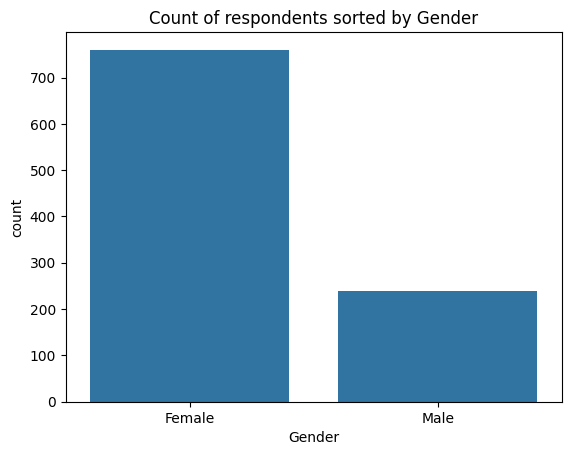

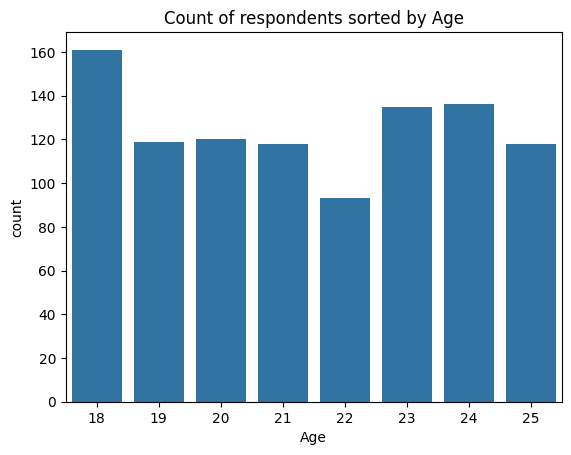

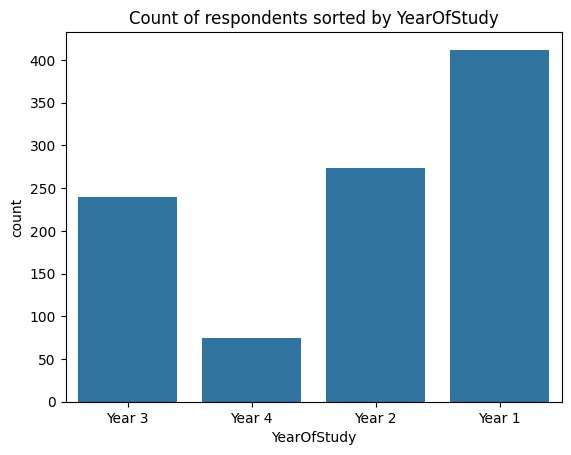

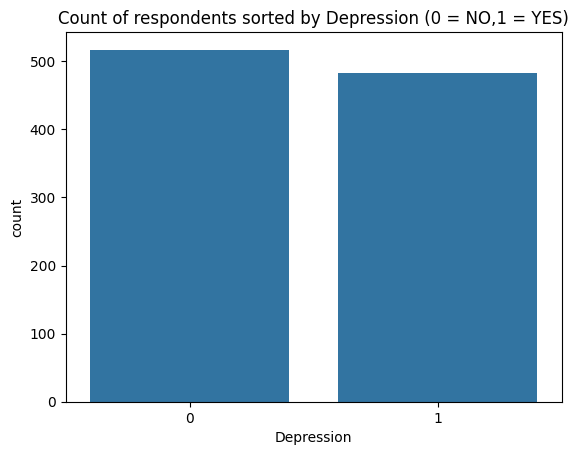

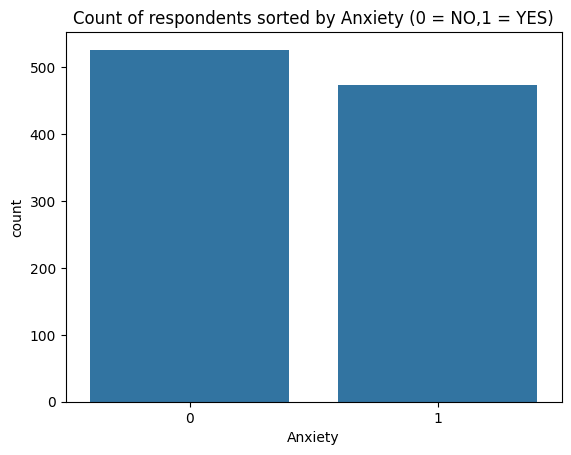

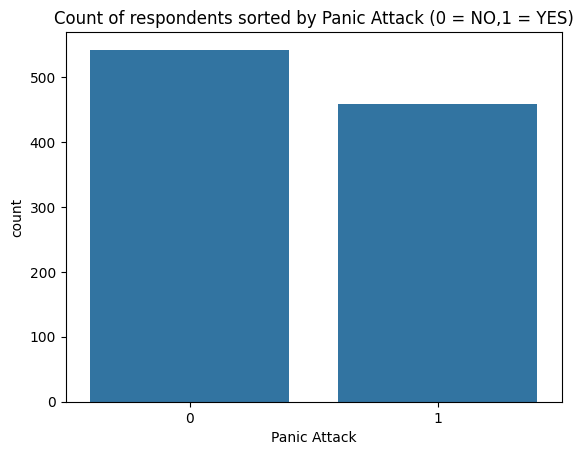

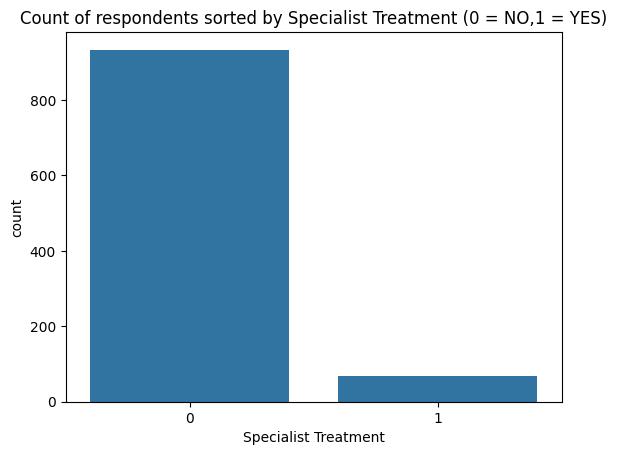

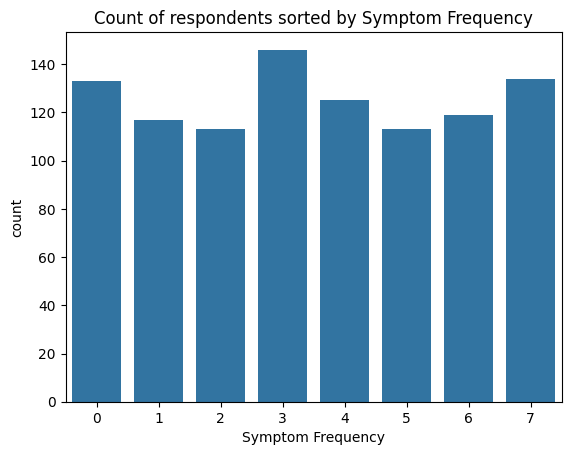

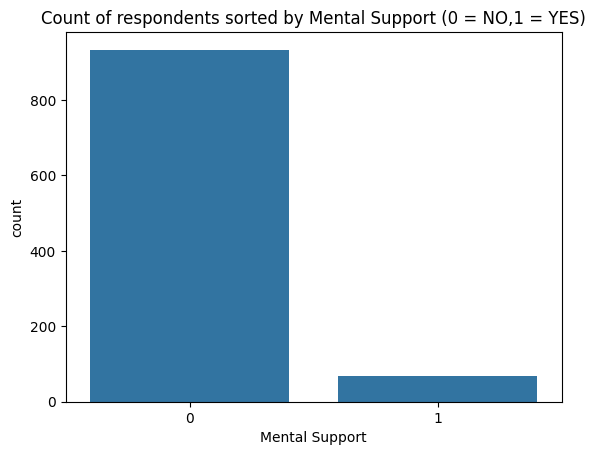

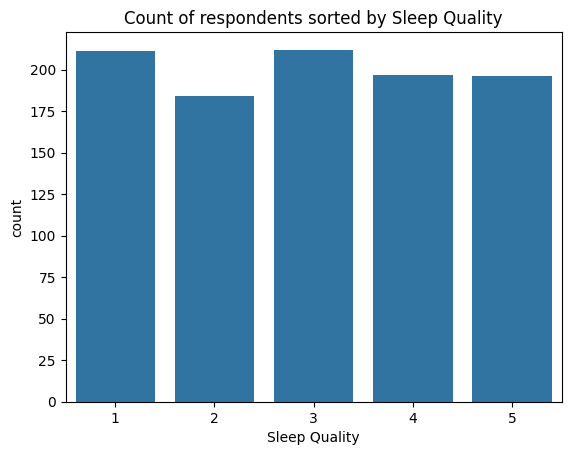

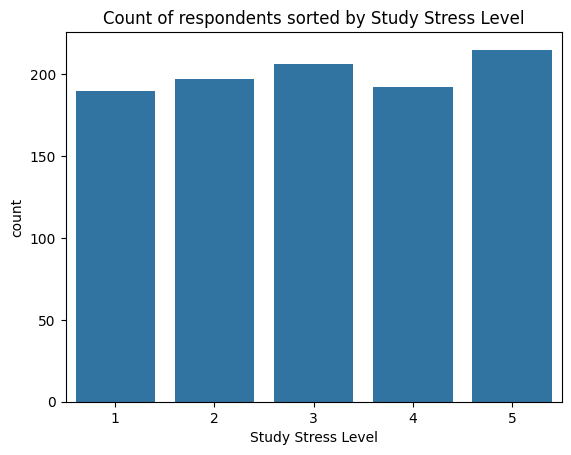

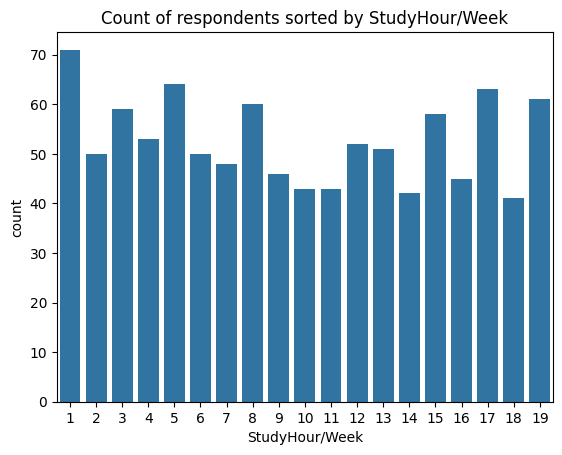

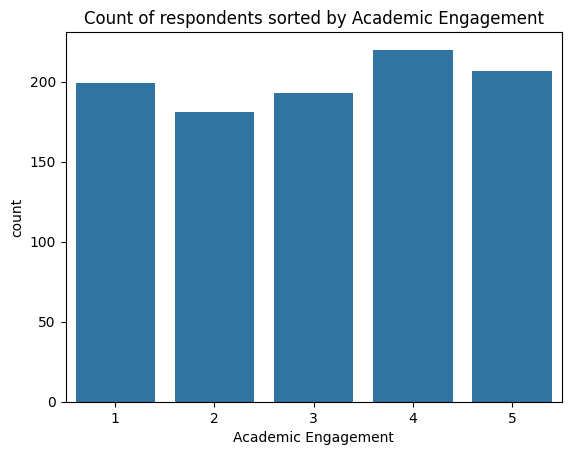

In [5]:
#Show count plots of numeric data
columns = df.columns.tolist()
columns_to_remove = ['Timestamp', 'CGPA','Course']
for col in columns_to_remove:
    if col in columns:
        columns.remove(col)

for i in columns:
    sns.countplot(x=i,data=df)
    if(df[i].isin([0,1]).all()):
        plt.title(f"Count of respondents sorted by {i} (0 = NO,1 = YES)")
    else:
        plt.title(f"Count of respondents sorted by {i}")
    plt.show()

In [6]:
#Count number of students courses, since using a bar graph is unsuitable
course_count = df['Course'].value_counts()
print (course_count)

Course
Engineering                180
BCS                        177
BIT                        101
KOE                         39
Biomedical science          33
Engine                      19
Laws                        19
psychology                  17
BENL                        16
CTS                         15
Business Administration     14
Koe                         14
engin                       14
Human Sciences              13
Nursing                     13
Law                         13
Communication               13
Marine science              12
Psychology                  12
Kirkhs                      12
Malcom                      12
Pendidikan Islam            12
Accounting                  11
DIPLOMA TESL                11
Usuluddin                   11
Fiqh                        11
KIRKHS                      10
Irkhs                       10
Pendidikan islam            10
ENM                          9
Human Resources              9
Mathemathics                 9
F

#Building a model - **WAN MUHAMMAD ATIF BIN TARAM SATIRAKSA (1211103154)**
We will build an SVM model that will predict whether a student is likely to experience depression based on their sleep quality, study/stress level, studyhour/week, and academic engagement.

##1. Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df[['Sleep Quality', 'Study Stress Level', 'StudyHour/Week', 'Academic Engagement']]
y = df['Depression']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 800
Testing set size: 200


##2. Train an SVM Model

SVM Accuracy: 0.53

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.59      0.55        99
           1       0.54      0.48      0.51       101

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200



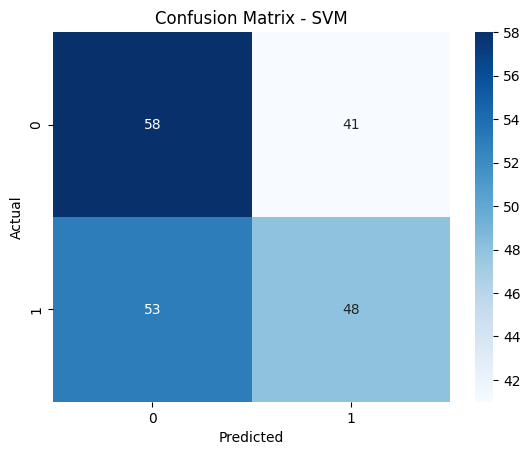

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()


##3. Hyperparameter Tuning for SVM

In [9]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Linear or Radial Basis Function kernel
    'gamma': [1, 0.1, 0.01, 0.001]  # Kernel coefficient for 'rbf'
}

# Perform grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated Accuracy:", grid.best_score_)

# Test the best model on the test set
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test)

print("Test Accuracy with Best SVM Model:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report (Best Model):\n", classification_report(y_test, y_pred_best))


Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validated Accuracy: 0.5325
Test Accuracy with Best SVM Model: 0.485

Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.49      0.71      0.58        99
           1       0.48      0.27      0.34       101

    accuracy                           0.48       200
   macro avg       0.48      0.49      0.46       200
weighted avg       0.48      0.48      0.46       200



##4. Visualizing the Results

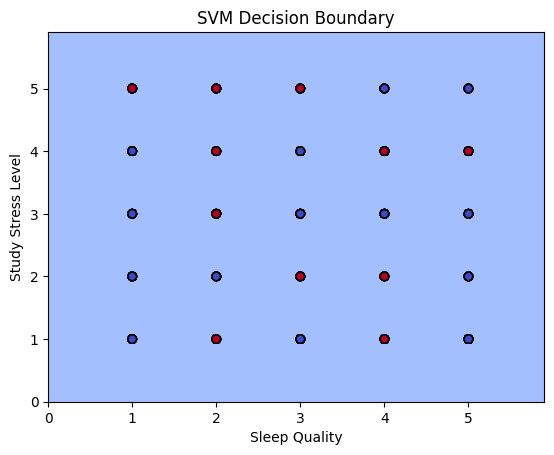

In [10]:
import numpy as np

# Select only two features for visualization
X_vis = X[['Sleep Quality', 'Study Stress Level']].values
y_vis = y.values

# Train the SVM model again with these features
svm_vis = SVC(kernel='linear')
svm_vis.fit(X_vis, y_vis)

# Create a mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict over the grid
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel('Sleep Quality')
plt.ylabel('Study Stress Level')
plt.title('SVM Decision Boundary')
plt.show()